In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [4]:
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['PRICE'] = california.target

In [5]:
X = data.drop(columns=['PRICE']).values
y = data['PRICE'].values.reshape(-1, 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
input_dim = X_train.shape[1]
weights = np.random.randn(input_dim, 1) * 0.01
bias = np.zeros((1, 1))

In [ ]:
learning_rate = 0.01
epochs = 100
losses = []

In [8]:
for epoch in range(epochs):
   
    y_pred = np.dot(X_train, weights) + bias
    loss = np.mean((y_pred - y_train) ** 2)
    losses.append(loss)

In [ ]:
dL_dw = (2 / len(y_train)) * np.dot(X_train.T, (y_pred - y_train))
dL_db = (2 / len(y_train)) * np.sum(y_pred - y_train)
    
weights -= learning_rate * dL_dw
bias -= learning_rate * dL_db

In [ ]:

if (epoch + 1) % 10 == 0:
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

Epoch 100/100, Loss: 5.5946


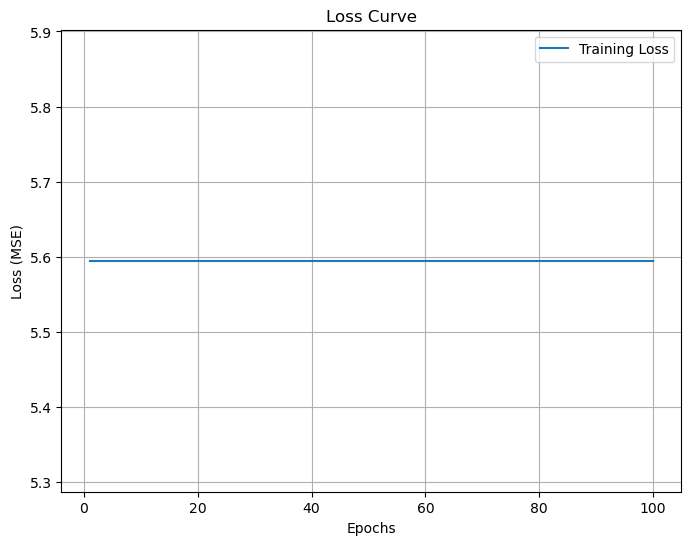

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()

In [12]:
y_test_pred = np.dot(X_test, weights) + bias
results = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_test_pred.flatten()
})

print("Predictions vs. Actuals:")
print(results.head(10))

Predictions vs. Actuals:
    Actual  Predicted
0  0.47700  -0.008591
1  0.45800   0.019591
2  5.00001  -0.007240
3  2.18600   0.097001
4  2.78000   0.030107
5  1.58700   0.073488
6  1.98200   0.082167
7  1.57500   0.046124
8  3.40000   0.046346
9  4.46600   0.129912
